# What's In The Deep-NLP Dataset?

Sheet_1.csv contains 80 user responses, in the response_text column, to a therapy chatbot. Bot said: 'Describe a time when you have acted as a resource for someone else'.  User responded. If a response is 'not flagged', the user can continue talking to the bot. If it is 'flagged', the user is referred to help.

Sheet_2.csv contains 125 resumes, in the resume_text column. Resumes were queried from Indeed.com with keyword 'data scientist', location 'Vermont'. If a resume is 'not flagged', the applicant can submit a modified resume version at a later date. If it is 'flagged', the applicant is invited to interview.

# What Do I Do With This?

Classify new resumes/responses as flagged or not flagged.

There are two sets of data here - resumes and responses. Split the data into a train set and a test set to test the accuracy of your classifier. Bonus points for using the same classifier for both problems.

Good luck.

#### data load

In [46]:
import pandas as pd
data1 = pd.read_csv("Sheet_1.csv").iloc[:,:3]

data2 = pd.read_csv("Sheet_2.csv",encoding='latin-1')

In [47]:
print (data1['class'].value_counts())
data1.head()

not_flagged    55
flagged        25
Name: class, dtype: int64


,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [48]:
print (data2['class'].value_counts())
data2.head()

not_flagged    92
flagged        33
Name: class, dtype: int64


,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


#### LabelEncoder // 0 : flagged 1 : not_flagged

In [49]:
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()

data1['Label'] = Encode.fit_transform(data1['class'])
data1['Label'].head()
#0 : flagged 1 : not_flagged

0    1
1    0
2    0
3    1
4    1
Name: Label, dtype: int64

## Classification 

#### Naive Bayes

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

x = data1.response_text
y = data1.Label

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

vect = CountVectorizer()
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

NB = MultinomialNB()
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.69999999999999996

#### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.80000000000000004

## wordclods

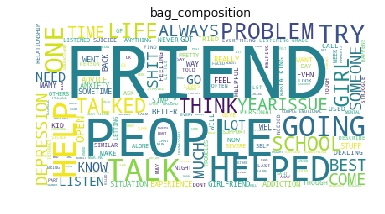

In [59]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud(dataframe):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("bag_composition")

wordcloud(data1['response_text'])
plt.show()

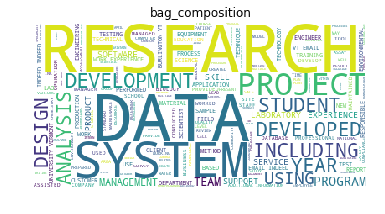

In [61]:
wordcloud(data2['resume_text'])
plt.show()

In [121]:
import nltk
from nltk import pos_tag, word_tokenize

def _pos_tag(data):
    pos_tag1 = []
    for i in range(len(data)):
        a = data[i].split()
        aa = pos_tag(a)
        pos_tag1.append(aa)
    print (pos_tag1)
_pos_tag(data1['response_text'])

[[('I', 'PRP'), ('try', 'VBP'), ('and', 'CC'), ('avoid', 'VBP'), ('this', 'DT'), ('sort', 'NN'), ('of', 'IN'), ('conflict', 'NN')], [('Had', 'VBD'), ('a', 'DT'), ('friend', 'NN'), ('open', 'VBZ'), ('up', 'RP'), ('to', 'TO'), ('me', 'PRP'), ('about', 'IN'), ('his', 'PRP$'), ('mental', 'JJ'), ('addiction', 'NN'), ('to', 'TO'), ('weed', 'VB'), ('and', 'CC'), ('how', 'WRB'), ('it', 'PRP'), ('was', 'VBD'), ('taking', 'VBG'), ('over', 'RP'), ('his', 'PRP$'), ('life', 'NN'), ('and', 'CC'), ('making', 'VBG'), ('him', 'PRP'), ('depressed', 'JJ')], [('I', 'PRP'), ('saved', 'VBD'), ('a', 'DT'), ('girl', 'NN'), ('from', 'IN'), ('suicide', 'NN'), ('once.', 'IN'), ('She', 'PRP'), ('was', 'VBD'), ('going', 'VBG'), ('to', 'TO'), ('swallow', 'VB'), ('a', 'DT'), ('bunch', 'NN'), ('of', 'IN'), ('pills', 'NNS'), ('and', 'CC'), ('I', 'PRP'), ('talked', 'VBD'), ('her', 'PRP'), ('out', 'IN'), ('of', 'IN'), ('it', 'PRP'), ('in', 'IN'), ('a', 'DT'), ('very', 'RB'), ('calm,', 'JJ'), ('loving', 'NN'), ('way.', '

In [126]:
from collections import Counter
for i in range(len(data1['response_text'])):
    a = Counter(data1['response_text'][i].split())
    print (a)

Counter({'I': 1, 'try': 1, 'and': 1, 'avoid': 1, 'this': 1, 'sort': 1, 'of': 1, 'conflict': 1})
Counter({'to': 2, 'his': 2, 'and': 2, 'Had': 1, 'a': 1, 'friend': 1, 'open': 1, 'up': 1, 'me': 1, 'about': 1, 'mental': 1, 'addiction': 1, 'weed': 1, 'how': 1, 'it': 1, 'was': 1, 'taking': 1, 'over': 1, 'life': 1, 'making': 1, 'him': 1, 'depressed': 1})
Counter({'a': 3, 'I': 2, 'of': 2, 'saved': 1, 'girl': 1, 'from': 1, 'suicide': 1, 'once.': 1, 'She': 1, 'was': 1, 'going': 1, 'to': 1, 'swallow': 1, 'bunch': 1, 'pills': 1, 'and': 1, 'talked': 1, 'her': 1, 'out': 1, 'it': 1, 'in': 1, 'very': 1, 'calm,': 1, 'loving': 1, 'way.': 1})
Counter({'i': 2, 'think': 2, 'cant': 1, 'of': 1, 'one': 1, 'really...i': 1, 'may': 1, 'have': 1, 'indirectly': 1})
Counter({'me': 4, 'the': 3, 'she': 3, 'he': 3, 'any': 2, 'calls': 2, 'her': 2, 'if': 2, "it's": 2, 'would': 2, 'Only': 1, 'really': 1, 'one': 1, 'friend': 1, 'who': 1, "doesn't": 1, 'fit': 1, 'into': 1, 'of': 1, 'above': 1, 'categories.': 1, 'Her': 1, '